In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [34]:
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False

In [30]:
df=pd.read_excel(r'D:\Documents\movie3_data.xlsx')

In [31]:
df=df.drop('Unnamed: 0',axis=1)

### 双轴图

In [35]:
import matplotlib.mlab as mlab

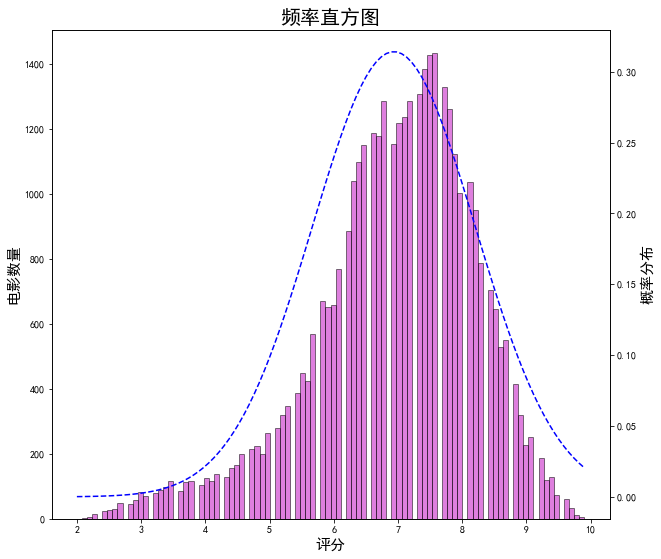

In [46]:
fig=plt.figure(figsize=(10,9))
ax1=fig.add_subplot(111)
n,bins,patches=ax1.hist(df['评分'],bins=100,color='m',alpha=0.5,edgecolor='k')
ax1.set_ylabel('电影数量',fontsize=15)
ax1.set_xlabel('评分',fontsize=15)
ax1.set_title('频率直方图',fontsize=20)

y=mlab.normpdf(bins,df['评分'].mean(),df['评分'].std())
ax2=ax1.twinx()
ax2.plot(bins,y,'b--')#bin为x轴
ax2.set_ylabel('概率分布',fontsize=15)
plt.show()

In [45]:
print(bins)

[2.    2.079 2.158 2.237 2.316 2.395 2.474 2.553 2.632 2.711 2.79  2.869
 2.948 3.027 3.106 3.185 3.264 3.343 3.422 3.501 3.58  3.659 3.738 3.817
 3.896 3.975 4.054 4.133 4.212 4.291 4.37  4.449 4.528 4.607 4.686 4.765
 4.844 4.923 5.002 5.081 5.16  5.239 5.318 5.397 5.476 5.555 5.634 5.713
 5.792 5.871 5.95  6.029 6.108 6.187 6.266 6.345 6.424 6.503 6.582 6.661
 6.74  6.819 6.898 6.977 7.056 7.135 7.214 7.293 7.372 7.451 7.53  7.609
 7.688 7.767 7.846 7.925 8.004 8.083 8.162 8.241 8.32  8.399 8.478 8.557
 8.636 8.715 8.794 8.873 8.952 9.031 9.11  9.189 9.268 9.347 9.426 9.505
 9.584 9.663 9.742 9.821 9.9  ]


### 根据电影时长和电影评分绘制散点图

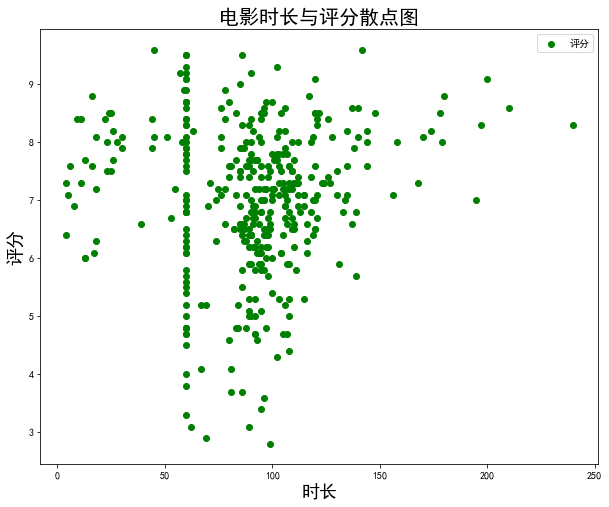

In [50]:
x=df['时长'][::100]
y=df['评分'][::100]

plt.figure(figsize=(10,8))
plt.scatter(x,y,color='g',marker='o')
plt.legend()#图例
plt.title('电影时长与评分散点图',fontsize=20)
plt.xlabel('时长',fontsize=18)
plt.ylabel('评分',fontsize=18)
plt.show()

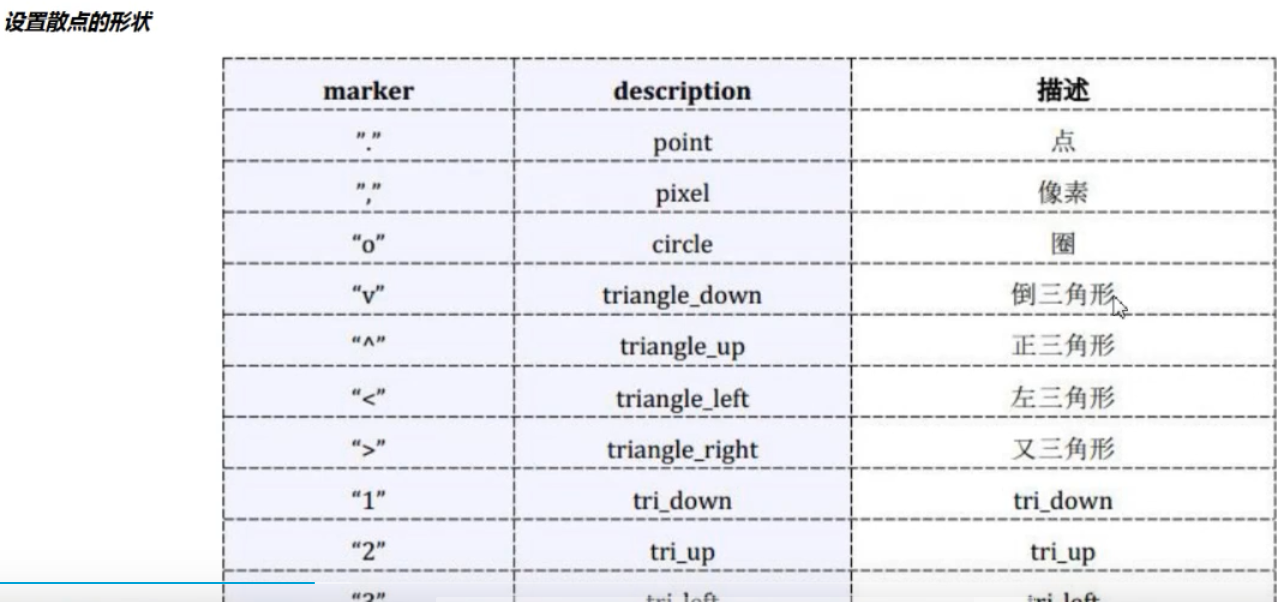

### 绘制各地区的评分箱形图

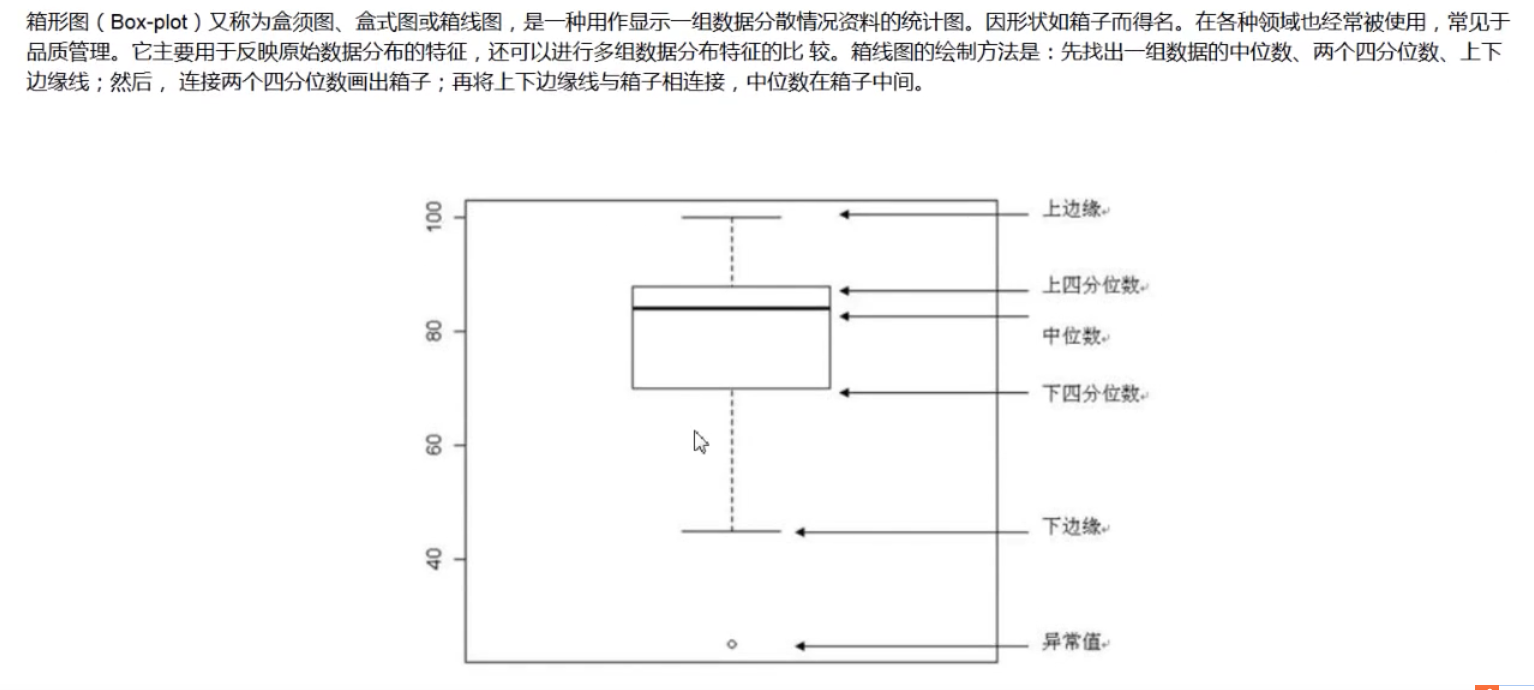

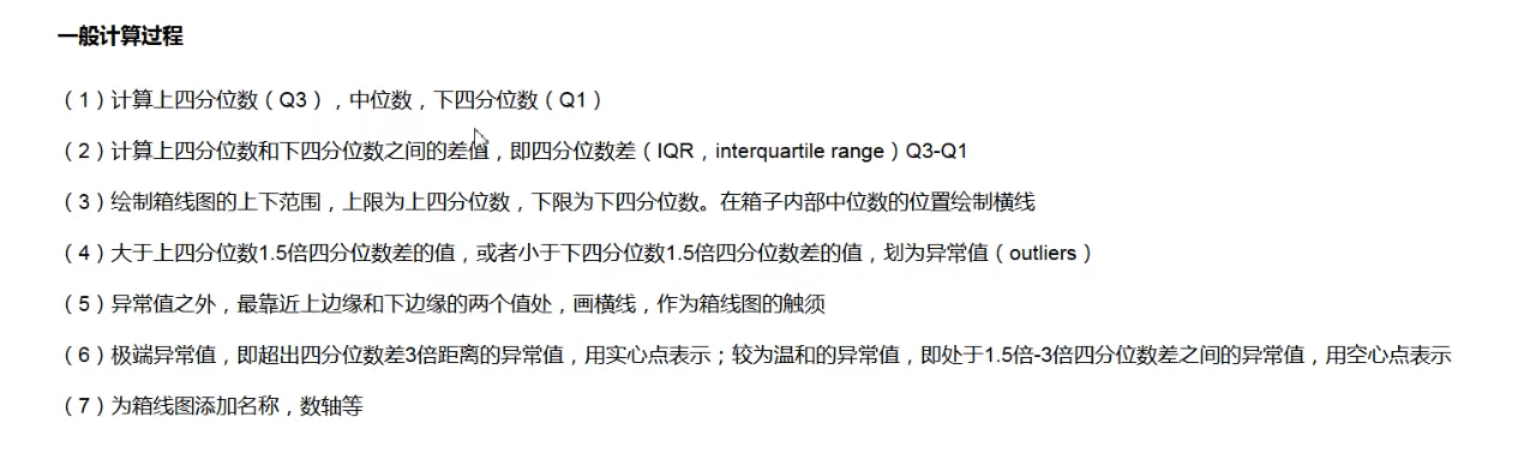

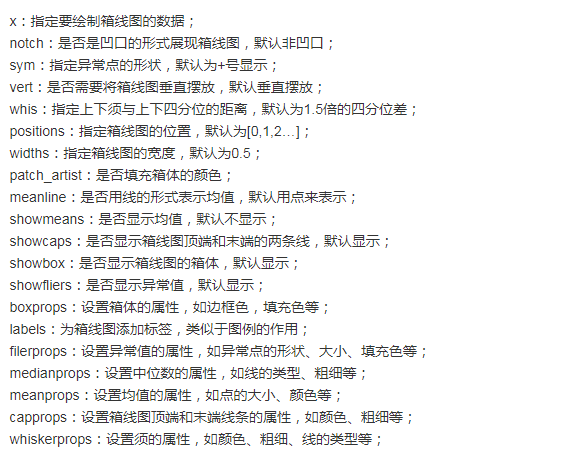

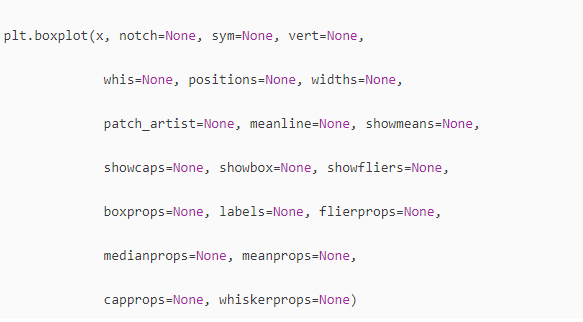

### 美国电影评分的厢线图

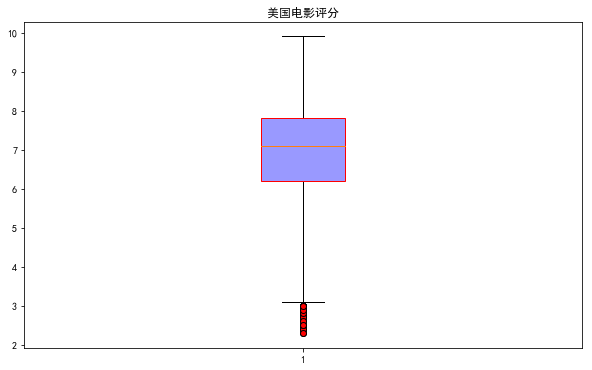

In [55]:
data=df[df.产地=='美国']['评分']
plt.figure(figsize=(10,6))
plt.boxplot(data,whis=2,flierprops={'marker':'o','markerfacecolor':'r','color':'k'},patch_artist=True,
           boxprops={'color':'r','facecolor':'#9999ff'})
plt.title('美国电影评分')
plt.show()

#### 多组数据箱线图

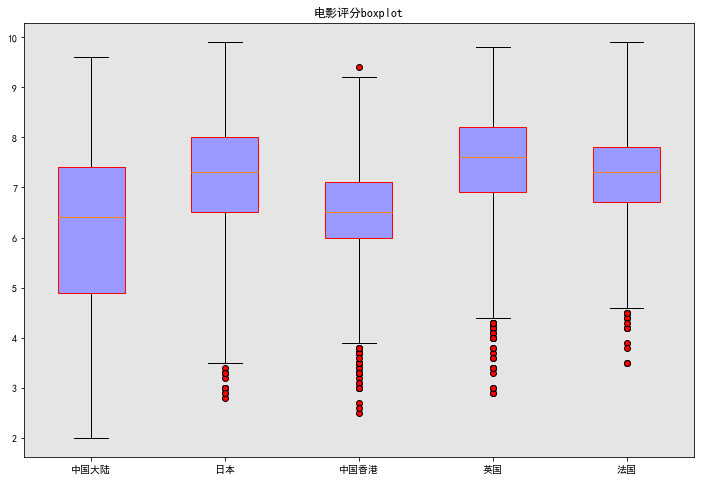

In [63]:
data1=df[df.产地=='中国大陆']['评分']
data2=df[df.产地=='日本']['评分']
data3=df[df.产地=='中国香港']['评分']
data4=df[df.产地=='英国']['评分']
data5=df[df.产地=='法国']['评分']

plt.figure(figsize=(12,8))
plt.boxplot([data1,data2,data3,data4,data5],labels=['中国大陆','日本','中国香港','英国','法国'],
           whis=2,flierprops={'marker':'o','markerfacecolor':'r','color':'k'},patch_artist=True,
           boxprops={'color':'r','facecolor':'#9999ff'})#Vert=false可以将箱线图转向
ax=plt.gca()#得到当前坐标系，getcurrentaxis
ax.patch.set_facecolor('gray')
ax.patch.set_alpha(0.2)
plt.title('电影评分boxplot')
plt.show()

### 相关系数矩阵图

In [69]:
data=df[['投票人数','评分','时长']]

#### pandas本身也封装了画图函数,可以画出各个属性之间的散点图，对角线是分布图

Populating the interactive namespace from numpy and matplotlib


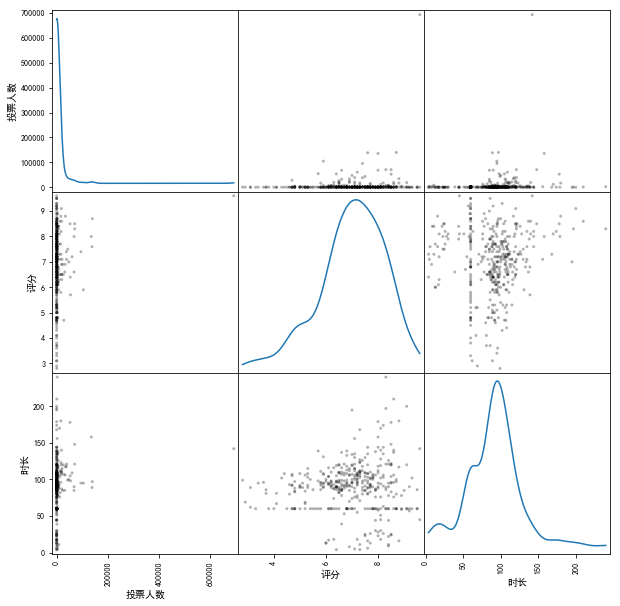

In [71]:
%pylab inline
result = pd.plotting.scatter_matrix(data[::100],diagonal='kde',color='k',alpha=0.3,figsize=(10,10))

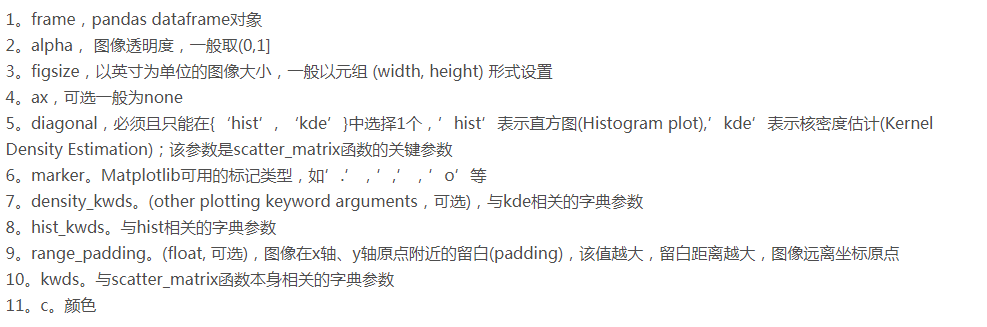

#### 画出电影时长，投票人数，评分的一个相关系数矩阵：可以用seaborn库，可以创建更具有统计意义的图标

In [72]:
import seaborn as sns

In [74]:
data.corr()

,投票人数,评分,时长
投票人数,1.000000,0.122957,0.142860
评分,0.122957,1.000000,0.039824
时长,0.142860,0.039824,1.000000


(array([0.5, 1.5, 2.5]), <a list of 3 Text yticklabel objects>)

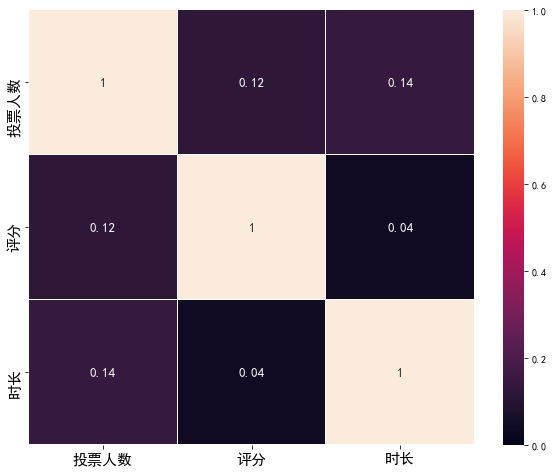

In [77]:
corr=data.corr()
corr=abs(corr) # 不考虑是正相关还是负相关

fig=plt.figure(figsize=(10,8))
ax=fig.add_subplot(figsize=(10,8))#也可以用这种方式来进行设置画图的大小
ax=sns.heatmap(corr,vmax=1,vmin=0,annot=True,annot_kws={'size':13,'weight':'bold'},linewidths=0.05)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show